<div class="alert alert-block alert-info">
    <p><img src="https://geekbrains.ru/apple-touch-icon-57x57.png" align="right" alt="GeekBrains"></p>
    <p style="color:DarkSlateGray"><b>Course:</b> Data Analysis Algorithms</p>
    <p style="color:DarkSlateGray"><b>Project:</b> Choose Tutors (Choose proper tutors for math exam)</p>
    <p style="color:DarkSlateGray"><b>Supervisor:</b> Sergey Shirkin</p>
    <p style="color:DarkSlateGray"><b>Author:</b> Dmitry Doni</p>
</div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import random

In [2]:
# Display charts in Jupyter Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
# Display inline plots as SVG
%config InlineBackend.figure_formats = ['svg']
# Set the limit of columns displayed in the notebook
pd.options.display.max_columns = 100

### Train Data

In [3]:
train_data_raw = pd.read_csv('../../datasets/choosetutors/train.csv')
train_data_raw.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [4]:
train_data_raw.shape

(10000, 13)

(array([  94.,  193.,  348.,  281.,  381.,  827.,  778.,  920., 1244.,
         861.,  819.,  734.,  411.,  353.,  588.,  456.,  407.,  225.,
          65.,   15.]),
 array([ 33.  ,  36.35,  39.7 ,  43.05,  46.4 ,  49.75,  53.1 ,  56.45,
         59.8 ,  63.15,  66.5 ,  69.85,  73.2 ,  76.55,  79.9 ,  83.25,
         86.6 ,  89.95,  93.3 ,  96.65, 100.  ]),
 <a list of 20 Patch objects>)

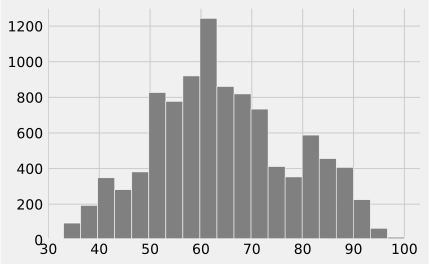

In [5]:
plt.hist(train_data_raw["mean_exam_points"], bins=20, color="gray", ec="white")

In [6]:
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.7 KB


In [7]:
train_data_raw.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [8]:
train_data_raw["choose"].value_counts(normalize = False)

0    8891
1    1109
Name: choose, dtype: int64

In [9]:
# Features: "age", "years_of_experience", "lesson_price", "qualification", "physics", "mean_exam_points"
# Select features to be used in prediction model
features = ["years_of_experience",
           "mean_exam_points"] 

In [10]:
classification_data = train_data_raw.loc[:, features].to_numpy()
classification_data.shape

(10000, 2)

In [11]:
classification_labels = train_data_raw["choose"].to_numpy()
classification_labels.shape

(10000,)

In [12]:
# Standardization (Z-score Normalization)

def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [13]:
# Standardize features

for x in range(classification_data.shape[1]):
    classification_data[:, x] = calc_std_feat(classification_data[:, x])
    
classification_data

array([[-1.11773006,  0.7035867 ],
       [ 0.01426311, -0.54693332],
       [ 0.5802597 ,  0.11510669],
       ...,
       [ 1.71225287, -0.39981332],
       [-1.11773006,  0.5564667 ],
       [ 1.71225287, -1.79745335]])

In [14]:
# Generate N bootstrap selections and subsets of features for finding split in node

random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [15]:
def get_subsample_classification(len_sample):
    # save the indexes of features
    sample_indexes = [i for i in range(len_sample)]
    
    # recommended subsample length: sqrt(len_sample) for classification, len_sample/3 for regression
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

#### Decision Tree

In [16]:
# Tree Node

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # index of the feature by which the value is compared with the threshold (t) in the node
        self.t = t  # threshold value
        self.true_branch = true_branch  # subtree where the node condition is satisfied (e.g. "left") 
        self.false_branch = false_branch  # subtree where the node condition is not satisfied (e.g. "right")

In [17]:
# Tree Leaf (Terminal Node)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # count the number of objects in each class
        classes = {}  # dictionary "class: number_of_objects"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        # prediction of the leaf is the class having the maximum number of objects    
        prediction = max(classes, key=classes.get)
        return prediction  

In [18]:
# Gini criterion

def gini(labels):
    #  count the number of objects in each class
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  calculate the criterion
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [19]:
# Model quality estimation

def quality(left_labels, right_labels, current_gini):

    # portion of left subtree selection
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

#### Build Tree

In [20]:
# Split dataset into "left" and "right" in a node

def split(data, labels, index, t):
    
    # split dataset by the threshold value
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [21]:
# Find best split

def find_best_split(data, labels):
    
    # tree constraints
    min_leaf = 1  # minimum number of objects in a leaf node, recommended values: 1 for classification, 5 for regression

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # select index from subselection (for classification, the length is sqrt(n_features))
    subsample = get_subsample_classification(n_features)
    
    for index in subsample:
        # check only unique feature values, excluding repeated values
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            
            # skip splits where the tree constraints are met:
            # the node contains fewer objects than specified in min_leaf
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
                       
            current_quality = quality(true_labels, false_labels, current_gini)
            
            # pick the threshold with the maximum quality increase 
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [22]:
# Build tree recursively

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    # base case: stop recursion when there is no quality increase
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # build two subtrees recursively
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # return the node class with its two subtrees
    return Node(index, t, true_branch, false_branch)

#### Random Forest

In [23]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

#### Class Prediction

In [24]:
def classify_object(obj, node):

    # base case: stop recursion when the node is a leaf
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [25]:
# prediction function for a single tree

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [26]:
# prediction by voting trees

def tree_vote(forest, data):

    # add predictions from all trees to a list
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # create a list of predictions for each object
    predictions_per_object = list(zip(*predictions))
    
    # for each object, prediction with most voted trees wins
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

#### Apply Model

In [27]:
# Split selection into train and test

train_data, test_data, train_labels, test_labels = train_test_split(classification_data, classification_labels, 
                                                                    test_size = 0.2, random_state = 42)

In [28]:
# Accuracy metric is the proportion of correct answers
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [29]:
def random_forest_n_trees(n_trees):
    
    my_forest = random_forest(train_data, train_labels, n_trees)
    
    # Get vote-based prediction for train data
    train_answers = tree_vote(my_forest, train_data)
    
    # Get vote-based prediction for test data 
    test_answers = tree_vote(my_forest, test_data)
    
    # Calculate accuracy on train data
    train_accuracy = accuracy_metric(train_labels, train_answers)
    print(f'Accuracy of random forest with {n_trees} trees on train data: {train_accuracy:.3f}')
    
    # Calculate accuracy on test data
    test_accuracy = accuracy_metric(test_labels, test_answers)
    print(f'Accuracy of random forest with {n_trees} trees on test data: {test_accuracy:.3f}')

In [31]:
random_forest_n_trees(100)

Accuracy of random forest with 100 trees on train data: 89.200
Accuracy of random forest with 100 trees on test data: 87.850


### Test Data

In [ ]:
test_data = pd.read_csv('../../datasets/choosetutors/test.csv')
test_data.head()

### Predictions

In [ ]:
test_final.loc[:, ["Id", "choose"]].to_csv('../datasets/choosetutors/DDoni_predictions.csv', index=None)